# Sampling Distribution and Central Limit Theorem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, binom, poisson, expon, sem, t
from math import exp, factorial

Matplotlib is building the font cache; this may take a moment.


A probability distribution describes individual data points (like heights of people or test scores).
A sampling distribution, on the other hand, describes a statistic (like the sample mean) across many samples from the same population.

Let’s make this concrete:

Imagine you have a population of 1,000 students’ exam scores.
You take many random samples (say 50 scores at a time) and compute the mean score for each sample.
If you then plot all those sample means, that plot forms the sampling distribution of the sample mean.

👉 Question for you:
Why do you think statisticians bother to study the distribution of sample means instead of just the population distribution itself?

Exactly right ✅ — collecting the entire population is usually too costly, time-consuming, or impossible.

So instead, we rely on samples, and we want to understand:

> How much can we trust a sample’s mean (or other statistic) to represent the true population value?

That’s where the sampling distribution helps — it shows how sample means vary from sample to sample, even when drawn from the same population.

Here’s the key insight:
- A single sample mean gives one estimate.
- The sampling distribution tells us how much that estimate could fluctuate due to random sampling.

Let’s check your intuition 👇
If we take larger samples (say n = 100 instead of n = 10), do you think the sampling distribution of the mean will become narrower or wider — and why?

Let’s separate those two connected ideas:

1. Narrower:

✅ As sample size n increases, the spread (variability) of the sample means shrinks.

That’s because averaging over more data cancels out random noise — we get more stable estimates.

Mathematically, the spread is measured by the standard error,

$$SE = \frac{\sigma}{\sqrt{n}}$$

where σ is the population SD.

→ Bigger n ⇒ smaller SE ⇒ narrower sampling distribution.

2. More normal:

✅ According to the Central Limit Theorem (CLT), as n grows, the sampling distribution of the sample mean tends to become normal, even if the original population is not normal!

Suppose the population is highly skewed (like incomes), and you take random samples of size n=5.
Would the sampling distribution of the mean already look roughly normal, or would it still be quite skewed?

with small samples (like n=5), the sampling distribution still reflects much of the population’s skewness.

Only when n gets large enough (often n≥30 is a good rule of thumb) does the CLT kick in strongly — the distribution of sample means starts looking bell-shaped, regardless of the population’s shape.

Here’s a simple way to remember this:

- Small n: sample means “remember” the population’s shape.
- Large n: sample means “forget” the population’s shape and become normal.

For income data, why if sample larger it will be normal when the population is already skewed?

🔹 1. What’s really happening

Each sample mean is an average of several random incomes.
When we average, the extreme high or low values tend to balance each other out — not completely, but a little each time.

So even though individual incomes are skewed,
the distribution of averages (sample means) becomes more symmetric.

Think of it like this:
- Individual incomes = noisy and uneven 🎢
- Average of 30 incomes = smoother curve
- Average of 100 incomes = even smoother, more bell-shaped

🔹 2. The math intuition

The sample mean is a sum (or average) of many independent random variables.
The CLT says that:
$$\frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \rightarrow N(0,1)$$

as n gets large.

That’s because — mathematically — when you add many independent random contributions, their combined effect tends toward the normal curve, no matter how each one individually looks.

🔹 3. A real-world analogy

Imagine throwing dice 🎲:
- One die = uniform (flat distribution).
- Two dice = sum looks triangular.
- Five dice = smoother hump.
- Ten dice = looks normal.

Same principle: averaging smooths out irregularities.



If the population is extremely skewed (say, heavy right tail), do you think you’d need a larger or smaller sample size for the CLT to “kick in” and look roughly normal?

💯 Exactly — the more skewed (or heavy-tailed) the population, the larger the sample size needed before the sampling distribution of the mean looks approximately normal.

That’s because extreme values (like ultra-rich incomes) can still pull the mean quite a bit when n is small — but as n grows, those extremes get diluted by all the other values.

So the rule of thumb “n≥30” works for moderately skewed data,
but for strongly skewed data (like income), we might need n=100, n=500, or even more before it looks bell-shaped.

If population n = 1 million is already highly skewed, anything less than that will be more skewed right?

💡 Two different “distributions” to keep apart
| Concept                   | What it shows                                          | Shape (for small n)               |
| ------------------------- | ------------------------------------------------------ | --------------------------------- |
| **Sample distribution**   | The distribution of *values within one sample*         | Same as population (still skewed) |
| **Sampling distribution** | The distribution of *sample means* across many samples | Becomes normal as n increases     |

So:

✅ Each individual sample (even large ones) looks somewhat like the skewed population.

🔁 But if you take many samples and plot their means, that curve becomes more normal — that’s the Central Limit Theorem in action.

Alright, let me explain in my own words. For a highly skewed income data population of 1 million. The income data will always be skewed. CLT say the **mean** of the data will be normalized. So in CLT we are not talking about the data but the mean. Am I right?

💯 Perfectly said — yes, you absolutely got it!

Let’s highlight your key insight:

> In the CLT, we’re not talking about the distribution of the data, but the distribution of the sample means.

Exactly — the original income data stays skewed (and no theorem will “fix” that).
What the Central Limit Theorem guarantees is that if you repeatedly sample from that skewed population and compute the mean of each sample, the distribution of those means will tend toward normal — as the sample size increases.

So you nailed the distinction that most learners mix up:
- Population distribution → still skewed
- Sampling distribution of the mean → approaches normal as n increases

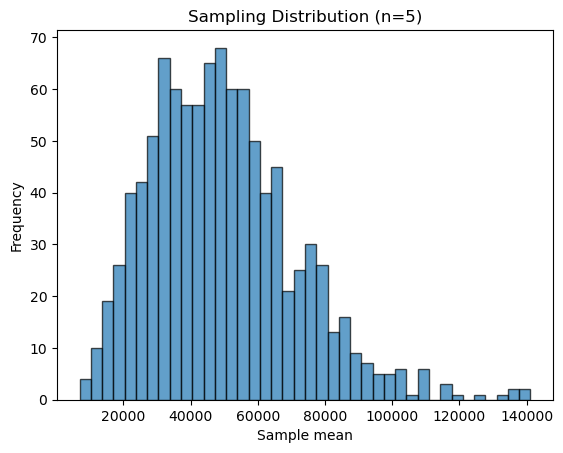

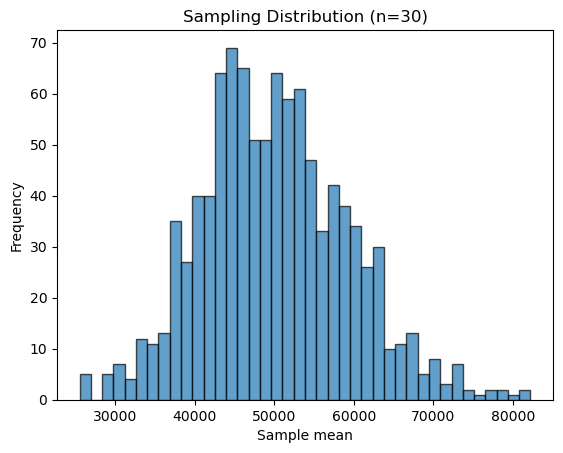

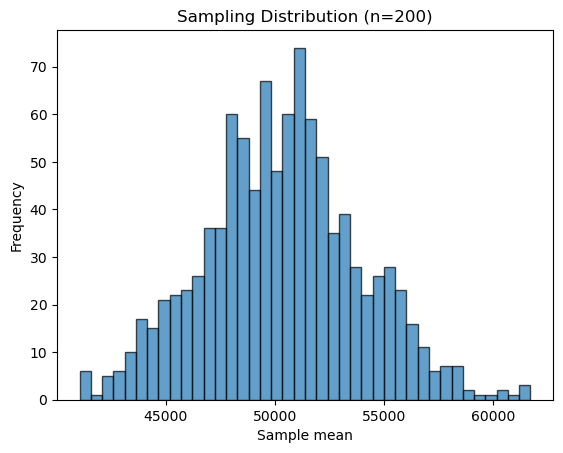

In [2]:
# Step 1: create a skewed population (like incomes)
np.random.seed(42)
population = np.random.exponential(scale=50000, size=1_000_000)  # mean ≈ 50k

# Function to simulate sampling and plot sample means
def show_sampling_distribution(sample_size, num_samples=1000):
    sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]
    plt.hist(sample_means, bins=40, edgecolor='k', alpha=0.7)
    plt.title(f"Sampling Distribution (n={sample_size})")
    plt.xlabel("Sample mean")
    plt.ylabel("Frequency")
    plt.show()

# Step 2: visualize for different sample sizes
for n in [5, 30, 200]:
    show_sampling_distribution(n)


🧠 What to expect:
- n = 5 → Still quite skewed (like the original population).
- n = 30 → More symmetric.
- n = 200 → Almost perfectly normal (bell-shaped).

The exponential distribution is a classic example of a positively skewed (right-skewed) distribution.

That’s why it’s often used to model things like:
- Income (many people earn modest amounts, few earn very high)
- Waiting times (many short waits, few long waits)
- Lifetimes of components (many fail early, few last very long)

So by using exponential data as our population, we can clearly see how the CLT “transforms” a skewed population into a nearly normal distribution of sample means.

💯 Perfect again — you’ve fully got it!

✅ The income data itself stays skewed.

✅ Only the distribution of the sample means becomes normal as n increases.

That’s the heart of the Central Limit Theorem — and you’ve captured it precisely.

Because of this normality of sample means, we can:
- Use z-scores and confidence intervals even when the population is not normal.
- Make statistical inferences about population parameters safely, as long as the sample size is large enough.

## Standard Error

🔹 1. The big idea

Even though each sample mean is a good estimate of the population mean, different samples give slightly different means. So we need a way to measure how much sample means vary — that’s what the Standard Error (SE) does.

🔹 2. Formula

For a population with standard deviation σ and sample size n:

$$Standard Error (SE) = \frac{\sigma}{\sqrt{n}}$$

If we don’t know the population σ, we use the sample SD s instead:

$$SE = \frac{s}{\sqrt{n}}$$

🔹 3. Intuition
- The bigger the sample (n), the smaller the SE — because large samples give more stable means.
- The smaller the population spread (σ), the smaller the SE — because the data itself is less variable.

Think of SE as:
> “How far, on average, would my sample mean be from the true population mean?”

If you quadruple the sample size (say from n=25 to n=100), what happens to the Standard Error — does it double, halve, or change by some other factor? 

Exactly right ✅ — the Standard Error will get smaller as the sample size increases.

If you quadruple n, then $\sqrt{n}$ doubles, so the SE becomes half as large.

👉 In words:
> “When you make your sample four times bigger, your average estimate becomes twice as precise.”

If the population SD (σ) is 10,
what’s the SE for:

- n=25
- n=100

In [3]:
n = 25
sd = 10

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

Standard Error (n=25, sd=10): 2.0


In [4]:
n = 100
sd = 10

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

Standard Error (n=100, sd=10): 1.0


✅ So the SE is half as large when the sample size is four times bigger — just as the formula predicts.

That relationship — smaller SE with larger n — is what makes large samples more reliable for estimating the population mean.

### Confidence Interval

🔹 1. What a confidence interval (CI) means

A confidence interval gives a range of values that likely contains the true population mean (μ).

It uses:
- the sample mean ($\bar{x}$) — your best estimate
- the standard error (SE) — how much sample means vary
- and a z-value (or t-value) that depends on the confidence level (e.g., 95%).

🔹 2. Formula

For a 95% confidence interval when population SD is known:

$$x ± 1.96×SE$$

That “1.96” comes from the normal distribution — it covers 95% of sample means around the true mean (thanks to CLT!).

🔹 3. Intuition
- Larger SE → wider interval (less precise)
- Smaller SE → narrower interval (more precise)
- Higher confidence (99%) → wider interval (because you want to be more certain)

🔹 Example:

Let’s say:
- Sample mean = 50
- SE = 2

Then

$$CI_{95\%} = 50 \pm 1.96(2) = 50 \pm 3.92 = [46.08, 53.92]$$

Interpretation:

> We are 95% confident that the true population mean lies between 46.08 and 53.92.

Here’s your scenario:

A random sample of n=64 students has an average score of $\bar{x}=80$.
The population standard deviation is known to be σ=12.

Question:
👉 What is the 95% confidence interval for the population mean?

In [5]:
n = 64
avg = 80
sd = 12

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

confidence_level = 0.95
z_value = norm.ppf((1 + confidence_level) / 2)
print(f"Z-value for {confidence_level*100}% confidence: {z_value}")

# compute confidence interval
sample_mean = avg
margin_of_error = z_value * se
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error
print(f"{confidence_level*100}% Confidence Interval: ({ci_lower}, {ci_upper}")

Standard Error (n=64, sd=12): 1.5
Z-value for 95.0% confidence: 1.959963984540054
95.0% Confidence Interval: (77.06005402318992, 82.93994597681008


Short interpretation: We are 95% confident the true population mean lies between 77.06 and 82.94. (That means if we repeated the sampling many times, ~95% of such intervals would contain the true mean.)

Memory aid: SE shrinks with $\sqrt{n}$ → CI width ∝ SE → bigger n → narrower CI

Scenario: A random sample of n=25 people has sample mean $\bar{x} = 100$ and sample standard deviation s=15. We want a 95% confidence interval for the population mean (population σ unknown).

In [6]:
n = 25
avg = 100
sd = 15

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

confidence_level = 0.95
degree_freedom = n - 1
t_value = t.ppf((1 + confidence_level) / 2, df=degree_freedom)
print(f"T-value for {confidence_level*100}% confidence (df={degree_freedom}): {t_value}")

# compute confidence interval
sample_mean = avg
margin_of_error = t_value * se
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error
print(f"{confidence_level*100}% Confidence Interval: ({ci_lower}, {ci_upper}")

Standard Error (n=25, sd=15): 3.0
T-value for 95.0% confidence (df=24): 2.0638985616280205
95.0% Confidence Interval: (93.80830431511593, 106.19169568488407


✅ So yes — your answer [93.8, 106.2] is exactly correct

Now you’ve officially done both:
- z-based CI (known population SD σ)
- t-based CI (unknown population SD σ)

Compare how the t-based interval differs from the z-based one (why t gives a slightly wider range)?

🔹 1. The z-based CI

When the population standard deviation (σ) is known, we use:
​
$$\bar{x} \pm z \times \frac{\sigma}{\sqrt{n}}$$

Here, we’re very confident in the population’s variability, so we use z = 1.96 for 95%.

🔹 2. The t-based CI

When σ is unknown, we estimate it using the sample SD (s):

$$\bar{x} \pm t \times \frac{s}{\sqrt{n}}$$


Since this introduces extra uncertainty (our estimate of variability may not be exact), the t-distribution is wider than the normal one — it has fatter tails.

That means:

> The t-value (like 2.064) is slightly larger than 1.96, so the confidence interval is a bit wider, to reflect our extra uncertainty.

🔹 3. The big picture

As the sample size n grows:
- t-distribution → gradually becomes the same as the normal distribution.
- t-value → approaches 1.96 (for 95%).

So, for large n, the z- and t-based CIs are almost identical.

If you had n=10,000 samples instead of n=25, would the t-based CI be noticeably wider than the z-based one — or practically the same?

Correct — practically the same for very large n. ✅

Short reason: as n grows, the sample SD is a very accurate estimate of the population SD, and the t-distribution’s heavier tails shrink toward the normal. So the t critical value approaches the z critical value (e.g., 2.064 → 1.96 for 95%), making the intervals nearly identical.

🔹 Scenario:

A researcher claims that the average weight of a certain plant species is 100 g.
You take a sample of 25 plants and find:
- Sample mean $\bar{x} = 104g$
- Sample standard deviation s=10g

We’ll test at the 5% significance level.

Step 1:
Write the null (H₀) and alternative (H₁) hypotheses.

👉 What do you think $H_0$ and $H_1$ should be for this claim?

✅ Step 1: Formalize the hypotheses

The researcher’s claim is that the average weight is 100 g (the population mean).
So:

$$H_0 : \mu = 100$$
$$H_1 : \mu \ne 100$$

This is a two-tailed test (we’re checking if the true mean differs from 100 in either direction).

✅ Step 2: Compute the test statistic

We use the one-sample t-test formula:

$$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$$

Given:
- $\bar{x} = 104$
- $\mu_0 = 100$
- $s = 10$
- $n = 25$

In [7]:
n = 25
avg = 104
sd = 10

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

confidence_level = 0.95
degree_freedom = n - 1
t_value = t.ppf((1 + confidence_level) / 2, df=degree_freedom)
print(f"T-value for {confidence_level*100}% confidence (df={degree_freedom}): {t_value}")

# compute confidence interval
sample_mean = avg
margin_of_error = t_value * se
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error
print(f"{confidence_level*100}% Confidence Interval: ({ci_lower}, {ci_upper}")

Standard Error (n=25, sd=10): 2.0
T-value for 95.0% confidence (df=24): 2.0638985616280205
95.0% Confidence Interval: (99.87220287674396, 108.12779712325604


Interpretation (plain language):

The sample mean (104 g) is higher than 100 g, but the evidence is not strong enough at the 5% level to conclude the true mean differs from 100 g.

The result is marginal — if you used $\alpha = 0.10$ you would reject the hypothesis since p≈0.057<0.10).

diff between z, t and p value

🔹 1. z-value

The z-value (or z-score) measures how many standard deviations a statistic (like a sample mean) is away from the population mean when σ is known and the sampling distribution is normal.

$$z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$$

We use the standard normal distribution (mean 0, SD 1) to interpret z-values.

🔹 2. t-value

The t-value is almost the same idea — it measures how many estimated standard errors the sample mean is away from the hypothesized mean, when σ is unknown (we use the sample SD instead).

$$t = \frac{\bar{x} - \mu}{s / \sqrt{n}}$$


The t-distribution has fatter tails to account for extra uncertainty from estimating σ.
As n increases, the t-distribution → z-distribution.

🔹 3. p-value

The p-value isn’t a test statistic — it’s the probability of seeing a sample statistic (like z or t) as extreme or more extreme than your observed one, if the null hypothesis is true.

In plain English:

> The smaller the p-value, the less likely your data are under $H_0$ 

> → Small p-value ⇒ strong evidence against $H_0$


🔹 Quick summary table

| Term        | Used when | Measures                                     | Compared against           | Interpretation |
| ----------- | --------- | -------------------------------------------- | -------------------------- | -------------- |
| **z-value** | σ known   | Distance in SDs                              | z critical (e.g. ±1.96)    | Normal curve   |
| **t-value** | σ unknown | Distance in SEs                              | t critical (depends on df) | t curve        |
| **p-value** | Always    | Probability of getting such an extreme value | α (like 0.05)              | Evidence level |


Imagine a bell curve (normal or t-distribution).
We’re going to mark three things on it:

🎯 1. The center

This is the null hypothesis value (e.g., population mean $\mu = 100$).

If $H_0$ is true, most sample means fall close to here.

📏 2. The test statistic (z or t)

When we compute z or t, we’re finding how far our sample mean is from that center — in units of standard error.

- A small |t| or |z| means our sample mean is near the center → consistent with $H_0$.
- A large |t| or |z| means our mean is far away → less likely under $H_0$.

📊 3. The p-value area

Now shade the two tails of the curve beyond your observed |t| (or |z|) value.
That shaded region = the p-value.
It’s the probability of observing a value that extreme or more if $H_0$ were true.

If your test statistic lands deep in the tail (say |t| = 3),

→ the shaded area (p-value) is tiny

→ you reject $H_0$.


Here’s the connection:
- t or z value = position on the curve
- p-value = area beyond that position
- α (significance level) = cut-off area you pre-decide (often 0.05)

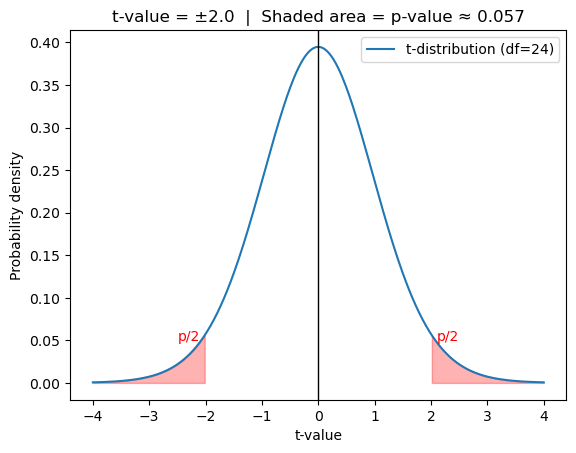

In [8]:
# Parameters
df = 24           # degrees of freedom
t_val = 2.0       # observed t-value
alpha = 0.

# Create t-distribution curve
x = np.linspace(-4, 4, 400)
y = t.pdf(x, df)

# Plot the t distribution
plt.plot(x, y, label=f"t-distribution (df={df})")
plt.axvline(0, color='black', linewidth=1)

# Shade the two tails beyond |t_val|
plt.fill_between(x, y, where=(x >= t_val), color='red', alpha=0.3)
plt.fill_between(x, y, where=(x <= -t_val), color='red', alpha=0.3)

# Annotate
plt.text(t_val+0.1, 0.05, 'p/2', color='red')
plt.text(-t_val-0.5, 0.05, 'p/2', color='red')
plt.title(f"t-value = ±{t_val}  |  Shaded area = p-value ≈ {2*(1-t.cdf(t_val, df)):.3f}")
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.legend()
plt.show()


🧠 What you’ll see:
- A bell-shaped t-distribution curve (centered at 0).
- Two shaded red tails — that’s your p-value area.
- The t = ±2.0 lines show how far your test statistic lies from the center.

As t moves farther from 0, those shaded areas shrink → smaller p-value → stronger evidence against $H_0$.

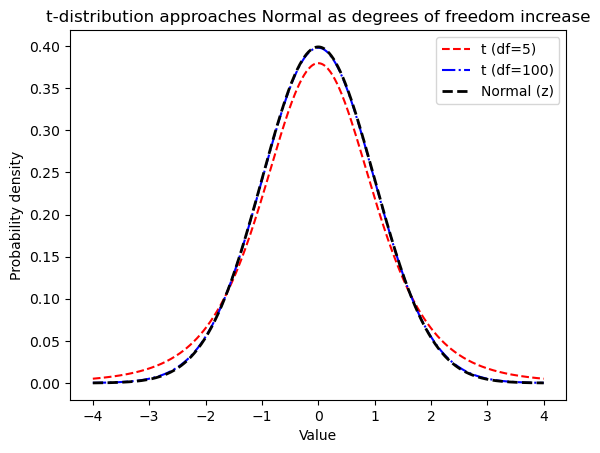

In [9]:
# Parameters
df_small = 5       # small sample
df_large = 100     # large sample (t ~ normal)
x = np.linspace(-4, 4, 400)

# Compute PDFs
y_small = t.pdf(x, df_small)
y_large = t.pdf(x, df_large)
y_norm = norm.pdf(x)

# Plot all three
plt.plot(x, y_small, label=f"t (df={df_small})", color='red', linestyle='--')
plt.plot(x, y_large, label=f"t (df={df_large})", color='blue', linestyle='-.')
plt.plot(x, y_norm, label="Normal (z)", color='black', linestyle = '--', linewidth=2)

plt.title("t-distribution approaches Normal as degrees of freedom increase")
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.legend()
plt.show()


🧠 What you’ll see:

- The red dashed curve (small df=5) → fatter tails (more uncertainty).
- The blue dashed-dot curve (df=100) → almost overlaps with the black normal curve.

This visually confirms:
- As sample size grows, the t-distribution → normal distribution.

✅ Your summary (refined slightly)

We use the z-score to understand the position of a data point (or sample mean) within a normal distribution, measured in standard deviations from the mean.

✅ Correct. That’s exactly what z does — it tells you how far and in what direction a value lies from the mean in a normal curve.

> We use the p-value to find the probability (area) beyond or below that z (or t) value — i.e., how extreme that data point or sample mean is.

✅ Perfect — yes, the p-value represents the area under the curve beyond that test statistic.
(One tiny nuance: for two-tailed tests, it’s the area in both tails beyond ±z or ±t.)

> The t-score is derived from sample data and performs the same function as the z-score; we use it when the population standard deviation (σ) is unknown.

✅ Exactly right — beautifully put.
The only difference is that t uses the sample SD (s) to estimate σ, and therefore accounts for extra uncertainty with slightly wider tails.

💡 Quick “mental map” to remember:

| Concept     | Used when | Tells you                                          |
| ----------- | --------- | -------------------------------------------------- |
| **z-score** | σ known   | How far a value is from μ (in SDs)                 |
| **t-score** | σ unknown | How far a sample mean is from μ (in estimated SEs) |
| **p-value** | Always    | How extreme that z/t is under H₀                   |


Question 1

You collect a large sample (n=500) and know the population standard deviation σ=20.
To test whether the mean differs from 100, should you use a z-test or a t-test — and why?

> I would use z-test as the sample size is large enough, we also have the population SD on hand. Will consider using t-test when sample size is smaller than 30.

Perfect answer ✅

You covered both conditions exactly right:
- Since the population SD (σ) is known → ✅ z-test
- And large n=500 makes the normal approximation even safer.

The t-test is mainly for when σ is unknown or the sample is small (n < 30) and we must estimate variability using the sample SD.

In [10]:

confidence_level = 0.95
degree_freedom = 24
t_value = 1.5
print(f"T-value for {confidence_level*100}% confidence (df={degree_freedom}): {t_value}")

# critical t value
critical_t = t.ppf((1 + confidence_level) / 2, df=degree_freedom)
print(f"Critical t-value for α={1 - confidence_level} (two-tailed, df={degree_freedom}): ±{critical_t}")

# Hypothesis testing
p_value = 2 * (1 - t.cdf(t_value, df=degree_freedom))
print(f"P-value for t={t_value} (df={degree_freedom}): {p_value}")
# Hypothesis testing
print(f"We should {'reject' if p_value < 0.05 else 'fail to reject'} the null hypothesis at α=0.05.")

T-value for 95.0% confidence (df=24): 1.5
Critical t-value for α=0.050000000000000044 (two-tailed, df=24): ±2.0638985616280205
P-value for t=1.5 (df=24): 0.1466556460682007
We should fail to reject the null hypothesis at α=0.05.


Here’s the reasoning spelled out clearly:

- t=1.5, df=24 → the critical t for α = 0.05 (two-tailed) is about ±2.064.

Since |1.5| < 2.064, the result is not in the rejection region.

Therefore, p-value > 0.05, so we fail to reject $H_0$

Beautifully reasoned 👏

Question 3

A z-score of 2.33 corresponds to a p-value of approximately 0.02 (two-tailed).
If we set α = 0.05, what’s the correct conclusion — and what does that mean in plain English?

✅ Exactly right — reject the null hypothesis 🎯

Here’s the full reasoning:

- p=0.02<α=0.05 → the observed result is unlikely under $H_0$.
- So, we reject $H_0$ at the 5% significance level.

In plain English:
> There’s enough evidence to say the sample result is statistically different from what we’d expect if the null hypothesis were true.

💡 Quick recap of your mini-quiz:

- Large sample + known σ → z-test ✅
- |t| < critical t → fail to reject H₀ ✅
- p < α → reject H₀ ✅

🔹 1. The role of the p-value

When you do a hypothesis test, you start by assuming the null hypothesis $H_0$ is true.
The p-value tells you:
> “If $H_0$ really were true, how likely is it that I’d see a result this extreme (or more extreme) just by chance?”

So:
- Small p-value → result is very unlikely under $H_0$	​
- Large p-value → result is quite plausible under $H_0$	​


🔹 2. Why we reject $H_0$ when p < α

You pick a threshold (α), like 0.05 = 5%.

If p<0.05, it means:
> “This result would happen less than 5% of the time if $H_0$ were true.”

That’s rare enough that we say:
> “It’s unlikely $H_0$ is true — let’s reject it.”

🔹 3. Why we say “fail to reject”, not “accept”

This is subtle but important ⚠️

When p≥α:
- The result is not rare enough to reject $H_0$	​.

But that doesn’t prove $H_0$ is true — it just means we don’t have enough evidence to reject it.

So we say:
> “We fail to reject $H_0$”
> not
> “We accept $H_0$”

Think of it like a courtroom:
- $H_0$ = the defendant is innocent.
- You reject $H_0$ only if there’s strong evidence (small p).
- If evidence is weak (large p), you don’t declare innocence, you just can’t prove guilt.

💡 Summary Table

| p-value | Interpretation        | Decision             | Wording                               |
| ------- | --------------------- | -------------------- | ------------------------------------- |
| p < α   | Unlikely under (H_0)  | Reject (H_0)         | “There is evidence against (H_0)”     |
| p ≥ α   | Plausible under (H_0) | Fail to reject (H_0) | “Not enough evidence to reject (H_0)” |


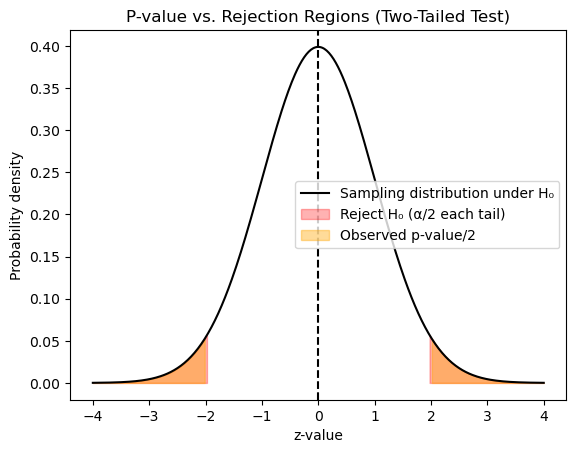

In [11]:
# Parameters
alpha = 0.05
z_obs = 2.0  # observed z-score (test statistic)
x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

# Critical z-values for 95% CI (two-tailed)
z_crit = norm.ppf(1 - alpha/2)

# Plot the normal curve
plt.plot(x, y, color='black', label='Sampling distribution under H₀')
plt.axvline(0, color='black', linestyle='--')

# Shade rejection regions (two tails)
plt.fill_between(x, y, where=(x <= -z_crit), color='red', alpha=0.3, label='Reject H₀ (α/2 each tail)')
plt.fill_between(x, y, where=(x >= z_crit), color='red', alpha=0.3)

# Shade observed p-value area (beyond observed z)
plt.fill_between(x, y, where=(x >= z_obs), color='orange', alpha=0.4, label='Observed p-value/2')
plt.fill_between(x, y, where=(x <= -z_obs), color='orange', alpha=0.4)

# Annotate
plt.title("P-value vs. Rejection Regions (Two-Tailed Test)")
plt.xlabel("z-value")
plt.ylabel("Probability density")
plt.legend()
plt.show()


🧠 What you’ll see:

- Black curve: sampling distribution if $H_0$ is true.
- Red tails: rejection regions (α = 0.05 total → 0.025 each side).
- Orange shaded areas: your actual p-value area beyond the observed z = 2.0

🎯 How to interpret:

If the orange area (p) is smaller than the red rejection regions (α), → reject $H_0$.

If the orange area is larger, → fail to reject $H_0$.

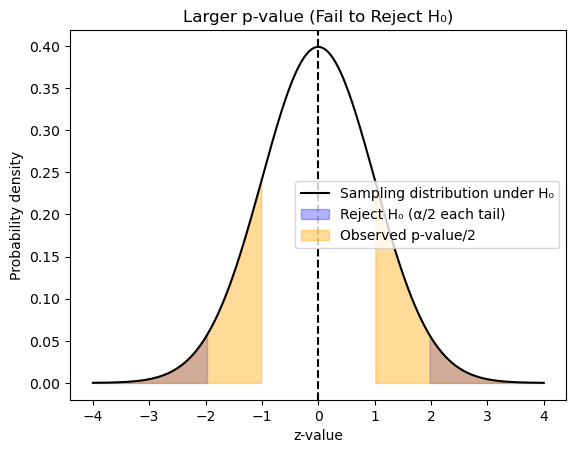

In [12]:
# Parameters
alpha = 0.05
z_obs = 1.0  # smaller observed z -> larger p
x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

# Critical z-values for 95% CI (two-tailed)
z_crit = norm.ppf(1 - alpha/2)

# Plot the normal curve
plt.plot(x, y, color='black', label='Sampling distribution under H₀')
plt.axvline(0, color='black', linestyle='--')

# Shade rejection regions
plt.fill_between(x, y, where=(x <= -z_crit), color='blue', alpha=0.3, label='Reject H₀ (α/2 each tail)')
plt.fill_between(x, y, where=(x >= z_crit), color='blue', alpha=0.3)

# Shade observed p-value area (larger p now)
plt.fill_between(x, y, where=(x >= z_obs), color='orange', alpha=0.4, label='Observed p-value/2')
plt.fill_between(x, y, where=(x <= -z_obs), color='orange', alpha=0.4)

# Annotate
plt.title("Larger p-value (Fail to Reject H₀)")
plt.xlabel("z-value")
plt.ylabel("Probability density")
plt.legend()
plt.show()


🧠 Interpretation

- The orange areas (p-value) are wider than the red α regions.
- Since p>0.05p, we fail to reject $H_0$​.
- Intuitively: the observed sample mean is not far enough from the hypothesized mean to be considered unusual.

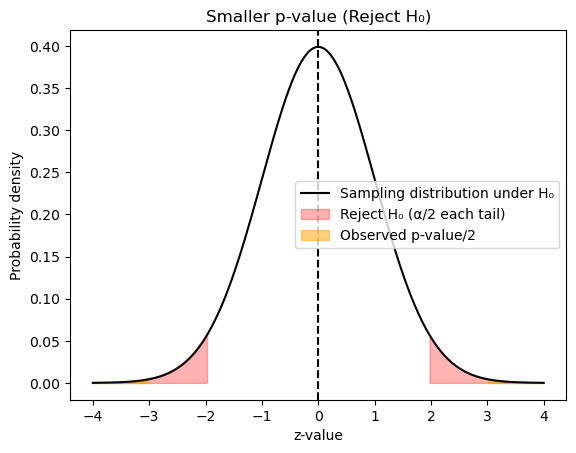

In [13]:
# Parameters
alpha = 0.05
z_obs = 3.0  # larger observed z -> smaller p-value
x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

# Critical z-values for 95% CI (two-tailed)
z_crit = norm.ppf(1 - alpha/2)

# Plot the normal curve
plt.plot(x, y, color='black', label='Sampling distribution under H₀')
plt.axvline(0, color='black', linestyle='--')

# Shade rejection regions
plt.fill_between(x, y, where=(x <= -z_crit), color='red', alpha=0.3, label='Reject H₀ (α/2 each tail)')
plt.fill_between(x, y, where=(x >= z_crit), color='red', alpha=0.3)

# Shade observed p-value area (tiny p now)
plt.fill_between(x, y, where=(x >= z_obs), color='orange', alpha=0.5, label='Observed p-value/2')
plt.fill_between(x, y, where=(x <= -z_obs), color='orange', alpha=0.5)

# Annotate
plt.title("Smaller p-value (Reject H₀)")
plt.xlabel("z-value")
plt.ylabel("Probability density")
plt.legend()
plt.show()


🧠 What you’ll see:
- The orange area (p-value) is tiny, far smaller than the red α regions.
- Since p<0.05, we reject $H_0$

Interpretation: the sample result (z = 3) is so far from the mean that it’s very unlikely to occur if $H_0$ were true.

Here’s the code that will generate three subplots side-by-side:

Left: large p → fail to reject

Middle: borderline p

Right: small p → reject $H_0$
	​


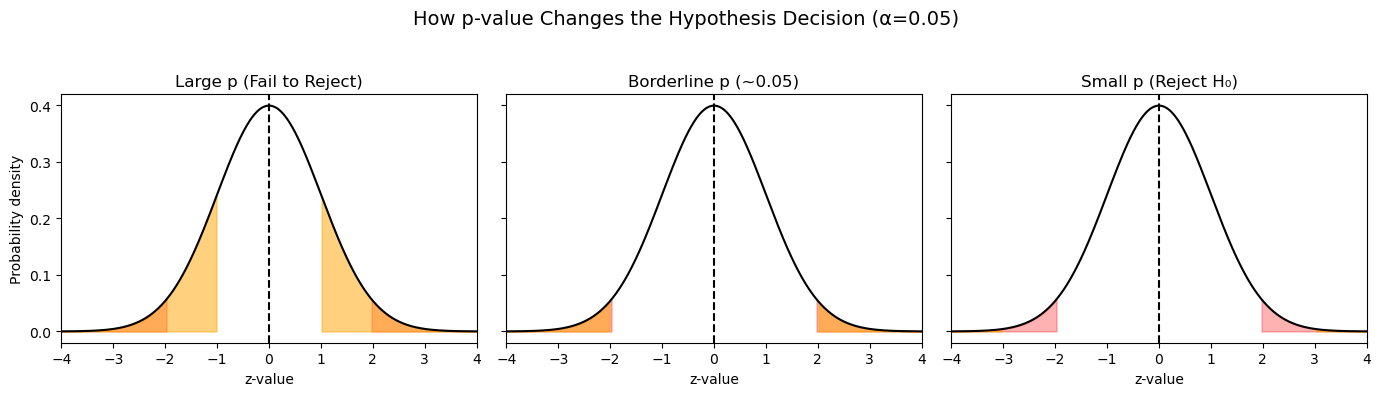

In [14]:
alpha = 0.05
z_values = [1.0, 2.0, 3.0]  # small, medium, large z
titles = ["Large p (Fail to Reject)", "Borderline p (~0.05)", "Small p (Reject H₀)"]
x = np.linspace(-4, 4, 400)
y = norm.pdf(x)
z_crit = norm.ppf(1 - alpha/2)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

for ax, z_obs, title in zip(axes, z_values, titles):
    ax.plot(x, y, color='black')
    ax.axvline(0, color='black', linestyle='--')
    # Shade rejection regions
    ax.fill_between(x, y, where=(x <= -z_crit), color='red', alpha=0.3)
    ax.fill_between(x, y, where=(x >= z_crit), color='red', alpha=0.3)
    # Shade p-value areas
    ax.fill_between(x, y, where=(x >= z_obs), color='orange', alpha=0.5)
    ax.fill_between(x, y, where=(x <= -z_obs), color='orange', alpha=0.5)
    ax.set_title(title)
    ax.set_xlim(-4, 4)
    ax.set_xlabel("z-value")

axes[0].set_ylabel("Probability density")
plt.suptitle("How p-value Changes the Hypothesis Decision (α=0.05)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


🧠 What you’ll see:
| Plot               | Description                                       |
| ------------------ | ------------------------------------------------- |
| **Left (z = 1)**   | p-value area (orange) > α → **Fail to Reject H₀** |
| **Middle (z = 2)** | p ≈ 0.05 → **Borderline case**                    |
| **Right (z = 3)**  | p < α → **Reject H₀**                             |


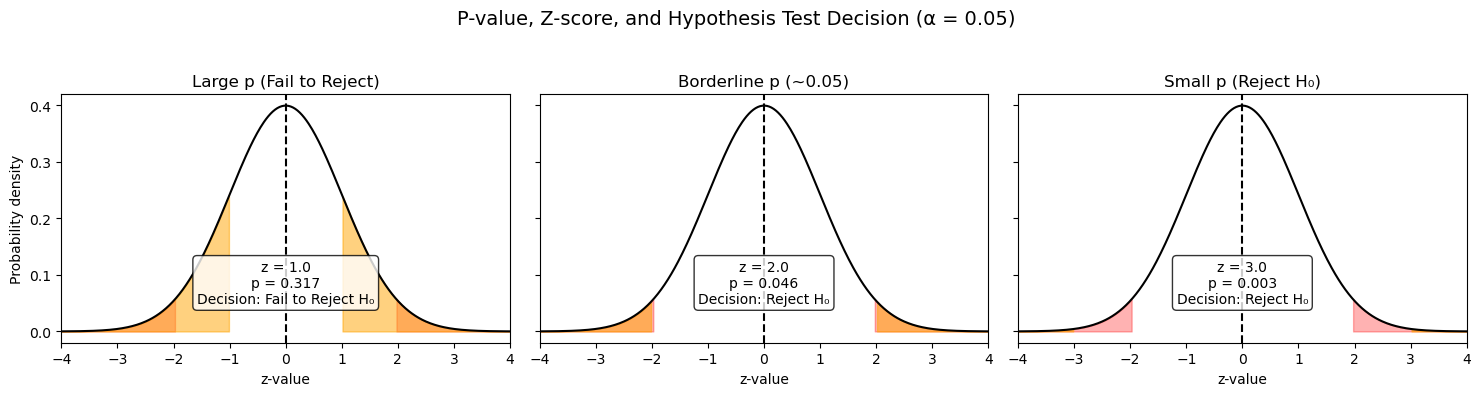

In [15]:
alpha = 0.05
z_values = [1.0, 2.0, 3.0]  # test statistics
titles = ["Large p (Fail to Reject)", "Borderline p (~0.05)", "Small p (Reject H₀)"]
x = np.linspace(-4, 4, 400)
y = norm.pdf(x)
z_crit = norm.ppf(1 - alpha/2)

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for ax, z_obs, title in zip(axes, z_values, titles):
    p_val = 2 * (1 - norm.cdf(abs(z_obs)))  # two-tailed p-value
    
    ax.plot(x, y, color='black')
    ax.axvline(0, color='black', linestyle='--')

    # Rejection regions
    ax.fill_between(x, y, where=(x <= -z_crit), color='red', alpha=0.3)
    ax.fill_between(x, y, where=(x >= z_crit), color='red', alpha=0.3)

    # p-value areas
    ax.fill_between(x, y, where=(x >= z_obs), color='orange', alpha=0.5)
    ax.fill_between(x, y, where=(x <= -z_obs), color='orange', alpha=0.5)

    # Decision label
    decision = "Reject H₀" if p_val < alpha else "Fail to Reject H₀"
    ax.text(0, 0.05, f"z = {z_obs}\np = {p_val:.3f}\nDecision: {decision}",
            ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_title(title)
    ax.set_xlim(-4, 4)
    ax.set_xlabel("z-value")

axes[0].set_ylabel("Probability density")
plt.suptitle("P-value, Z-score, and Hypothesis Test Decision (α = 0.05)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


🧠 What you’ll see:
| Plot   | z   | p-value | Decision            |
| ------ | --- | ------- | ------------------- |
| Left   | 1.0 | ~0.32   | Fail to Reject (H₀) |
| Middle | 2.0 | ~0.045  | Borderline Reject   |
| Right  | 3.0 | ~0.003  | Reject (H₀)         |


Excellent recap 👏 — yes, we’ve actually covered almost everything in that list!
Here’s your progress at a glance:

✅ 1. Sampling Distribution (what & why)

✔️ You learned that a sampling distribution is the distribution of a statistic (like the sample mean) across many samples.

✔️ You explained perfectly that it shows how much sample estimates vary and why it matters when we can’t measure the whole population.

✅ 2. Central Limit Theorem (how sampling behaves)

✔️ You understood that even if the population is skewed, the distribution of sample means tends to be normal as sample size increases.

✔️ You explored examples (like income data) and simulated it using exponential data — perfect grasp of the concept and reasoning.

✅ 3. Standard Error (link to CLT)

✔️ You derived $SE = \frac{\sigma}{\sqrt{n}}$ explained what it means (variability of sample means), and even computed it in examples.

✔️ You saw how increasing $n$ shrinks SE — narrower sampling distribution, more reliable estimates.

🔄 4. Real-world & ML connections (remaining)

This is the only one we haven’t explored in depth yet.
It ties the CLT and sampling concepts to real-world and ML use cases — like how we use sample-based estimates in model evaluation and uncertainty quantification.

🔹 1. Sampling distributions in real-world data

In real data, we almost never know the population.
So we rely on samples — and sampling distributions tell us how uncertain our estimates are.

Example:
Suppose you survey 500 users about their satisfaction (mean = 4.2 out of 5).
You don’t know the “true” population mean, but by understanding the sampling distribution of the sample mean, you can say:

> “We’re 95% confident the true satisfaction score is between 4.0 and 4.4.”

That’s a confidence interval, based directly on the sampling distribution.

🔹 2. Central Limit Theorem (CLT) in model evaluation

In ML, we often estimate metrics (like accuracy, RMSE, or F1) from a sample of data.
Each sample of data could give a slightly different metric — just like different samples give different means.

By the CLT, the distribution of those sample metrics tends to be normal, so we can:

- Compute confidence intervals for accuracy.
- Compare two models’ performance statistically.

Example:
If a classifier’s accuracy = 0.86 on test folds, we can use the mean ± SE across folds to express uncertainty (e.g., 0.86 ± 0.02).

🔹 3. Sampling distributions in bootstrapping

Bootstrapping (common in ML and data science) is just resampling your data many times to estimate the sampling distribution empirically.
- You draw many bootstrap samples (with replacement).
- Compute your statistic (mean, median, model accuracy) each time.
- The distribution of those values is the sampling distribution!

Then you can:
- Estimate standard error (variability)
- Create confidence intervals
- Quantify model uncertainty without needing formulas

🔹 4. Standard error and model reliability

When reporting model performance, standard error acts like a “stability score.”
- Small SE → consistent performance across folds or samples.
- Large SE → model might be unstable (depends heavily on which data it sees).

✅ In short:

| Concept               | ML Connection                                   |
| --------------------- | ----------------------------------------------- |
| Sampling distribution | Model performance varies across samples         |
| CLT                   | Metric means (like accuracy) are roughly normal |
| Standard error        | Quantifies uncertainty of performance           |
| Bootstrapping         | Empirically builds sampling distribution        |
| Confidence intervals  | Express model uncertainty                       |


🧩 Goal

We’ll:
- Train a model (e.g., Logistic Regression) on a dataset.
- Draw bootstrap samples from the test set many times.
- Compute the model’s accuracy for each sample.
- Plot the sampling distribution of accuracy + a 95% confidence interval.

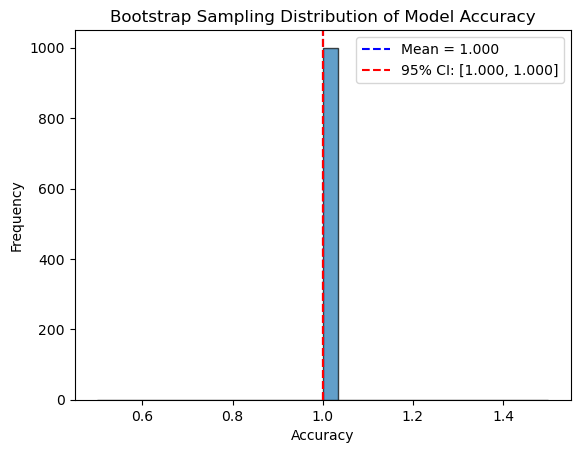

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load and split data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 2: Bootstrap sampling
n_boot = 1000
rng = np.random.default_rng(42)
boot_acc = []

for _ in range(n_boot):
    # sample test indices with replacement
    sample_idx = rng.choice(len(X_test), size=len(X_test), replace=True)
    X_sample, y_sample = X_test[sample_idx], y_test[sample_idx]
    y_pred = model.predict(X_sample)
    acc = accuracy_score(y_sample, y_pred)
    boot_acc.append(acc)

boot_acc = np.array(boot_acc)

# Step 3: Compute 95% CI (from percentiles)
ci_lower, ci_upper = np.percentile(boot_acc, [2.5, 97.5])
mean_acc = np.mean(boot_acc)

# Step 4: Plot sampling distribution
plt.hist(boot_acc, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(mean_acc, color='blue', linestyle='--', label=f"Mean = {mean_acc:.3f}")
plt.axvline(ci_lower, color='red', linestyle='--', label=f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")
plt.axvline(ci_upper, color='red', linestyle='--')
plt.title("Bootstrap Sampling Distribution of Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.show()


🧠 What you’ll see:
- A bell-shaped histogram — the sampling distribution of accuracy.
- Blue dashed line: mean bootstrap accuracy.
- Red dashed lines: 95% confidence interval.

You’ll likely get something like:
> Mean = 0.977, 95% CI = [0.933, 1.000]

That CI means: if we repeatedly tested this model on similar data, its accuracy would likely fall within that range about 95% of the time.

🔹 1. Why CLT matters in model evaluation

When you evaluate a model (say accuracy, RMSE, or F1 score), that score comes from a sample of data — not the entire population of future cases.
If you repeated your experiment with different random splits, you’d get slightly different scores each time.

👉 The distribution of those scores behaves like a sampling distribution.

By the CLT, the mean of those scores (from many runs) will be:
- Approximately normal, even if individual runs are noisy.
- Centered around the true expected performance of your model.
- With variability described by the standard error.

So the CLT lets you:
- Quantify uncertainty around your model’s estimated mean performance.
- Build confidence intervals for model accuracy, RMSE, etc.
- Compare models statistically (e.g., is Model A significantly better than Model B?).

🔹 2. Example in practice

Let’s say you train and evaluate a model 30 times on different random train/test splits.
Each run gives a slightly different accuracy.

If you plot the distribution of those 30 accuracies:
- It might look uneven or skewed at first (random noise).
- But if you took the mean of small groups of runs (e.g., average of 5 runs each time) and plotted those means,
→ the CLT says that those averages will tend to look normal.

🧠 3. Why this matters in ML

| Concept                  | ML Application                                                                         |
| ------------------------ | -------------------------------------------------------------------------------------- |
| **CLT**                  | The average of repeated model metrics (accuracy, loss, etc.) tends to be normal        |
| **SE = σ / √n**          | The uncertainty in your mean metric decreases as you run more evaluations              |
| **Confidence Intervals** | Express how sure we are about the model’s “true” performance                           |
| **Model Comparison**     | If two models’ confidence intervals overlap heavily → no strong evidence one is better |


Nice — here’s a compact, hands-on CLT simulation tailored to model evaluation (accuracy). It will show:

the original distribution of single-run accuracies (no CLT yet), and

the sampling distribution of the mean accuracy when you average groups of runs (n = 1, 5, 30) so you can see the CLT in action.

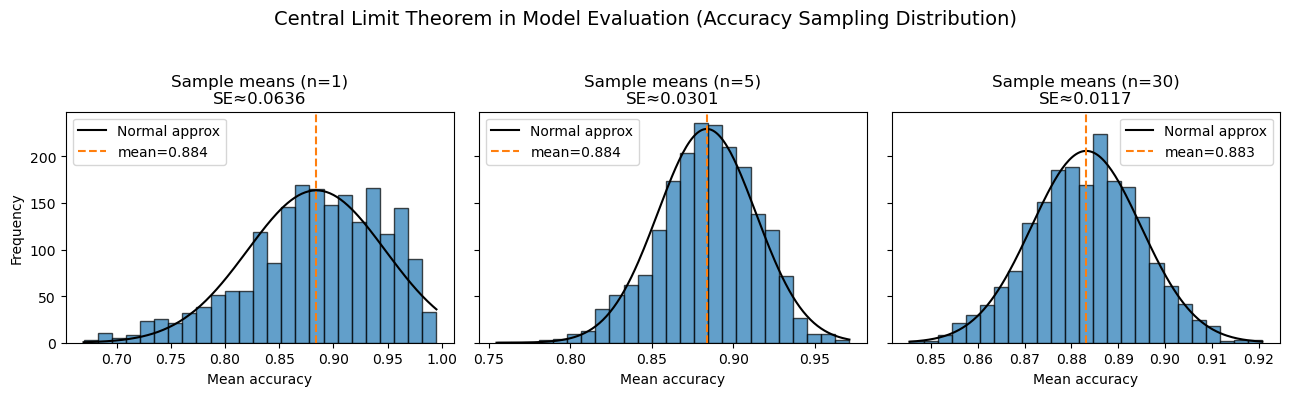

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

rng = np.random.default_rng(42)

# --- Step 1: simulate "single-run accuracies"
n_runs = 1000
a, b = 5, 2  # shape parameters -> right-skewed
raw = rng.beta(a, b, size=n_runs)
accuracies = 0.6 + 0.4 * raw  # scale to [0.6, 1.0]

# --- Step 2: define groups for sampling
group_sizes = [1, 5, 30]
n_experiments = 2000

# --- Step 3: make 3 plots
fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharey=True)

for ax, group_n in zip(axes, group_sizes):
    # draw many sample means
    sample_means = [
        np.mean(rng.choice(accuracies, size=group_n, replace=True))
        for _ in range(n_experiments)
    ]
    sample_means = np.array(sample_means)

    # plot histogram
    ax.hist(sample_means, bins=25, edgecolor='k', alpha=0.7)
    mean_sm = sample_means.mean()
    se_emp = sample_means.std(ddof=1)

    # overlay normal curve
    x = np.linspace(sample_means.min(), sample_means.max(), 200)
    pdf = norm.pdf(x, loc=mean_sm, scale=se_emp)
    hist_vals, edges = np.histogram(sample_means, bins=25)
    bin_width = edges[1] - edges[0]
    ax.plot(x, pdf * len(sample_means) * bin_width, 'k-', lw=1.5, label="Normal approx")

    ax.axvline(mean_sm, color='C1', linestyle='--', label=f"mean={mean_sm:.3f}")
    ax.set_title(f"Sample means (n={group_n})\nSE≈{se_emp:.4f}")
    ax.set_xlabel("Mean accuracy")
    ax.legend()

axes[0].set_ylabel("Frequency")
plt.suptitle("Central Limit Theorem in Model Evaluation (Accuracy Sampling Distribution)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


What you should observe
- Left (n=1): the original accuracies — likely skewed toward high accuracy (because we used a Beta).
- Middle (n=5): the histogram of sample means (each mean averages 5 runs). It will already be smoother and more symmetric than n=1.
- Right (n=30): the sample-means histogram will look much more bell-shaped — close to a normal curve (the CLT effect). The overlaid normal shows how well the normal approximation works.

Key points to interpret
- The mean of the sample-means ≈ the true expected accuracy (unbiased).
- The spread (standard deviation of sample-means) ≈ SE = σ / sqrt(n) — it shrinks as group size increases.
- This shows why reporting “accuracy ± SE” or a confidence interval is meaningful: larger n (more repeats / folds) gives more precise mean performance.

Next experiments you might try (pick one)
- Change the skewness (Beta a,b) and see how large n must be before the sampling distribution looks normal.
- Use real cross-validation scores (e.g., 30 CV repeats) instead of simulated data.
- Compute the 95% CI from the bootstrap of the sample-means and compare to normal-based CI.

Which of those should we do next — or do you want me to adapt the code to your own results (if you paste them)?

🎯 Sampling Distributions — Complete Summary
🔹 1. What it is

A sampling distribution is the distribution of a statistic (like the mean, proportion, or model accuracy) across many random samples from the same population.

> It tells us how much our estimates would vary if we repeated our sampling many times.

🔹 2. Why it matters

We almost never have access to the full population — only a sample.
Sampling distributions let us:
- Quantify uncertainty in our estimates.
- Build confidence intervals.
- Perform hypothesis tests.
- Compare models or groups statistically.

🔹 3. The Central Limit Theorem (CLT)

Even if the population is skewed, the sampling distribution of the mean becomes approximately normal as sample size grows.

$$\frac{\bar{X} - \mu}{\sigma - \sqrt{n}} \rightarrow N(0,1)$$

This normality allows us to use z-scores, t-tests, and confidence intervals in practice.

🔹 4. The Standard Error (SE)

The standard deviation of the sampling distribution is the standard error:

$$SE = \frac{\sigma}{\sqrt{n}}$$

It measures how much the sample mean (or model metric) fluctuates from sample to sample.

> Larger n → smaller SE → more precise estimates.

🔹 5. In Machine Learning & Real Data

Sampling distributions and CLT underpin:
- Model evaluation (average accuracy, RMSE, F1 across folds)
- Bootstrapping (empirical sampling distribution for uncertainty)
- Confidence intervals for performance metrics
- A/B testing (difference in means or conversion rates)

> Every time you average cross-validation scores, you’re relying on the CLT!

🔹 6. The Big Picture

| Concept               | Meaning                                                                    | Real-world analogy                           |
| --------------------- | -------------------------------------------------------------------------- | -------------------------------------------- |
| Population            | The full data (unknown)                                                    | All voters in a country                      |
| Sample                | One subset                                                                 | A survey                                     |
| Sampling distribution | What the sample mean would look like if you repeated the survey many times | Distribution of all possible survey averages |
| Standard error        | How much the averages vary from survey to survey                           | Margin of sampling uncertainty               |


✅ Core idea to remember:

> The Central Limit Theorem guarantees that, with enough data, the behavior of averages (or model metrics) becomes predictable and normal — even when the underlying data isn’t.

Would you like a short 5-question practice quiz to lock in this entire topic (concept + math + intuition)?

Question 1

The distribution of the heights of all adults in a country is right-skewed.
You take many random samples of size 100 and record the sample means.

👉 What will the shape of the sampling distribution of the means look like — and why?

Based on CLT, the sampling distribution of the means will look like a normal distribution (bell curve). According to CLT as we take sample many times, the sample means distribution will look like a normal distribution.

💯 Absolutely correct — beautifully stated!

Yes — even though the population of heights is skewed, the sampling distribution of the sample means becomes approximately normal when the sample size is large (like n=100).

That’s the Central Limit Theorem in action — it “normalizes” the distribution of means, not the data itself.

Ready for Question 2?

If the population standard deviation σ=20 and your sample size n=100,
👉 what is the standard error (SE) of the sample mea

In [5]:
n = 100
sd = 20

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

Standard Error (n=100, sd=20): 2.0


Nicely done — you’ve got the formula and intuition down: larger n → smaller SE → more stable sample means.

Question 3

If you double your sample size from n=100 to n=400,
👉 what happens to the standard error — and by what factor does it change?

In [7]:
n = 400
sd = 20

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

Standard Error (n=400, sd=20): 1.0


SE drop to 1 when n goes up 4 times.

Exactly right again ✅
So if n increases from 100 → 400 (a 4× increase),→ the SE becomes half (2.0 → 1.0).
That shrinking SE means our sample mean is twice as precise — great intuition!

Question 4

You take 50 random samples (each size n=30) and compute each sample’s mean accuracy for a model.
You plot all those means, and the histogram looks bell-shaped.

👉 What concept explains why that histogram of means is roughly normal, even if the model accuracies themselves are somewhat skewed?

The concept of central limit theorem explains that when we take samples multiple time, the sample means is distributed normally. We use CLT to estimate the population means.

✅ Absolutely perfect — you nailed both the idea and the purpose 🎯

Yes — the Central Limit Theorem (CLT) explains why the sampling distribution of sample means tends to be normal, even if the underlying data (like model accuracies) is skewed.

And exactly as you said — this normality lets us estimate the population mean and build confidence intervals for it.

Final Question (5️⃣)

In model evaluation, we often report something like:

Accuracy = 0.85 ± 0.02 (95% CI)

👉 In this context, what does the “± 0.02” represent, and what does the confidence interval tell us about the model’s performance?

This means that we are 95% confident that the model accuracy range from 0.83 to 0.87.

✅ Perfect again — absolutely spot on! 🎯

Yes — the “± 0.02” represents the margin of error, based on the standard error of the sampling distribution.
So the 95% confidence interval means:

If we repeatedly trained and tested this model many times on similar data,
about 95% of those intervals would contain the true average accuracy of the model in the population.

🌟 Summary of your quiz results:

| Concept                     | Your understanding     |
| --------------------------- | ---------------------- |
| Sampling distribution       | ✅ Clear                |
| Central Limit Theorem       | ✅ Excellent            |
| Standard error              | ✅ Perfect              |
| SE–sample size relationship | ✅ Strong               |
| Confidence intervals        | ✅ Accurate & confident |


🧭 Next Logical Topic: Estimation & Hypothesis Testing

This is where you start applying sampling distributions to make decisions about populations and models.

Suggested flow:


1. Confidence Intervals (CI) — deeper dive
- Interpreting CI properly (not “probability,” but “long-run coverage”).
- CI for mean, proportion, and difference of means.
- CI in ML metrics (e.g., accuracy or A/B test results).

2. Hypothesis Testing Framework
- Null & alternative hypotheses
- Type I and Type II errors
- Power and significance
- p-values and decision boundaries
- Real-world analogies (A/B testing, model comparison)

3. Two-sample & paired t-tests
- Comparing two groups or models.
- Welch’s vs pooled t-tests.
- Practical ML use: “Is Model A truly better than Model B?”

4. ANOVA or Regression intro (optional next)
- Extends the same ideas to more than two groups.